In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link = "C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/result.csv"

dataset = pd.read_csv(link)

In [3]:
dataset.describe().T # 'T' vai transpor a tabela

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17908.0,8953.500000,5169.738646,0.000000,4476.750000,8953.500000,13430.250000,17907.000000
pay_schedule_1,17908.0,0.598392,0.490237,0.000000,0.000000,1.000000,1.000000,1.000000
pay_schedule_2,17908.0,0.206388,0.404724,0.000000,0.000000,0.000000,0.000000,1.000000
pay_schedule_3,17908.0,0.111905,0.315259,0.000000,0.000000,0.000000,0.000000,1.000000
pay_schedule_4,17908.0,0.083315,0.276365,0.000000,0.000000,0.000000,0.000000,1.000000
home_owner,17908.0,0.425173,0.494383,0.000000,0.000000,0.000000,1.000000,1.000000
income,17908.0,36.572147,15.048901,9.050000,25.800000,32.600000,46.700000,99.850000
current_address_year,17908.0,3.584711,2.751937,0.000000,2.000000,3.000000,5.000000,12.000000
has_debt,17908.0,0.795399,0.403421,0.000000,1.000000,1.000000,1.000000,1.000000
amount_requested,17908.0,95.044645,69.854368,35.000000,60.000000,70.000000,110.000000,1020.000000


In [4]:
X = dataset.drop(['e_signed'], axis=1)
y = dataset['e_signed']

In [5]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion="entropy", n_estimators=5, max_depth=15)

In [7]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.8135620263262864

In [8]:
rfc.fit(X_test, y_test)
rfc.score(X_test, y_test)

0.8518518518518519

In [9]:
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)

print(score)

0.8518518518518519


[See More](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)

## Bem, agora vamos documentar e testar outros valores para comprovar que o resultado anterior foi o melhor possivel

### Mas antes, vamos deixar algumas coisas enclarecidas:

1. `max_depth` trabalhará com valores múltiplos de 100 (de 100 a 1000),
2. `n_estimators` trabalhará com valores múltiplos de 10 (de 10 a 50), 

Com isso, o notebook poderá trabalhar mais efetivamente (*sem interferir muito na acurácia*).

1. Do tipo critério, o `entropy`

In [10]:
# Vamos até o max_depth=500 
for n_estimators_loop in range(100, 600, 100):
    for max_depth_loop in range(10, 60, 10):
        model = RandomForestClassifier(
            criterion="entropy", 
            n_estimators=n_estimators_loop, 
            max_depth=max_depth_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{n_estimators_loop}, {max_depth_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.754
Acuracia com intervalo [100, 20] => 0.9932
Acuracia com intervalo [100, 30] => 1.0
Acuracia com intervalo [100, 40] => 1.0
Acuracia com intervalo [100, 50] => 1.0


Acuracia com intervalo [200, 10] => 0.7572
Acuracia com intervalo [200, 20] => 0.9949
Acuracia com intervalo [200, 30] => 1.0
Acuracia com intervalo [200, 40] => 1.0
Acuracia com intervalo [200, 50] => 1.0


Acuracia com intervalo [300, 10] => 0.7563
Acuracia com intervalo [300, 20] => 0.9954
Acuracia com intervalo [300, 30] => 1.0
Acuracia com intervalo [300, 40] => 1.0
Acuracia com intervalo [300, 50] => 1.0


Acuracia com intervalo [400, 10] => 0.7599
Acuracia com intervalo [400, 20] => 0.9954
Acuracia com intervalo [400, 30] => 1.0
Acuracia com intervalo [400, 40] => 1.0
Acuracia com intervalo [400, 50] => 1.0


Acuracia com intervalo [500, 10] => 0.756
Acuracia com intervalo [500, 20] => 0.9962
Acuracia com intervalo [500, 30] => 1.0
Acuracia com intervalo [500, 40] => 1.0
Acur

In [11]:
# Vamos de max_depth=500 a max_depth=1000
for n_estimators_loop in range(600, 1100, 100):
    for max_depth_loop in range(10, 60, 10):
        model = RandomForestClassifier(
            criterion="entropy", 
            n_estimators=n_estimators_loop, 
            max_depth=max_depth_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{n_estimators_loop}, {max_depth_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.7603
Acuracia com intervalo [600, 20] => 0.9963
Acuracia com intervalo [600, 30] => 1.0
Acuracia com intervalo [600, 40] => 1.0
Acuracia com intervalo [600, 50] => 1.0


Acuracia com intervalo [700, 10] => 0.7554
Acuracia com intervalo [700, 20] => 0.9956
Acuracia com intervalo [700, 30] => 1.0
Acuracia com intervalo [700, 40] => 1.0
Acuracia com intervalo [700, 50] => 1.0


Acuracia com intervalo [800, 10] => 0.7568
Acuracia com intervalo [800, 20] => 0.9954
Acuracia com intervalo [800, 30] => 1.0
Acuracia com intervalo [800, 40] => 1.0
Acuracia com intervalo [800, 50] => 1.0


Acuracia com intervalo [900, 10] => 0.7594
Acuracia com intervalo [900, 20] => 0.9958
Acuracia com intervalo [900, 30] => 1.0
Acuracia com intervalo [900, 40] => 1.0
Acuracia com intervalo [900, 50] => 1.0


Acuracia com intervalo [1000, 10] => 0.756
Acuracia com intervalo [1000, 20] => 0.9965
Acuracia com intervalo [1000, 30] => 1.0
Acuracia com intervalo [1000, 40] => 1.0

2. Do tipo critério, o `log_loss`

In [12]:
# Vamos até o max_depth=500 
for n_estimators_loop in range(100, 600, 100):
    for max_depth_loop in range(10, 60, 10):
        model = RandomForestClassifier(
            criterion="log_loss", 
            n_estimators=n_estimators_loop, 
            max_depth=max_depth_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{n_estimators_loop}, {max_depth_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.7498
Acuracia com intervalo [100, 20] => 0.9903
Acuracia com intervalo [100, 30] => 1.0
Acuracia com intervalo [100, 40] => 1.0
Acuracia com intervalo [100, 50] => 1.0


Acuracia com intervalo [200, 10] => 0.7558
Acuracia com intervalo [200, 20] => 0.9942
Acuracia com intervalo [200, 30] => 1.0
Acuracia com intervalo [200, 40] => 1.0
Acuracia com intervalo [200, 50] => 1.0


Acuracia com intervalo [300, 10] => 0.7504
Acuracia com intervalo [300, 20] => 0.9943
Acuracia com intervalo [300, 30] => 1.0
Acuracia com intervalo [300, 40] => 1.0
Acuracia com intervalo [300, 50] => 1.0


Acuracia com intervalo [400, 10] => 0.7548
Acuracia com intervalo [400, 20] => 0.9955
Acuracia com intervalo [400, 30] => 1.0
Acuracia com intervalo [400, 40] => 1.0
Acuracia com intervalo [400, 50] => 1.0


Acuracia com intervalo [500, 10] => 0.7579
Acuracia com intervalo [500, 20] => 0.9965
Acuracia com intervalo [500, 30] => 1.0
Acuracia com intervalo [500, 40] => 1.0
Ac

In [13]:
# Vamos até o max_depth=500 
for n_estimators_loop in range(600, 1100, 100):
    for max_depth_loop in range(10, 60, 10):
        model = RandomForestClassifier(
            criterion="log_loss", 
            n_estimators=n_estimators_loop, 
            max_depth=max_depth_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{n_estimators_loop}, {max_depth_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.7537
Acuracia com intervalo [600, 20] => 0.9955
Acuracia com intervalo [600, 30] => 1.0
Acuracia com intervalo [600, 40] => 1.0
Acuracia com intervalo [600, 50] => 1.0


Acuracia com intervalo [700, 10] => 0.7575
Acuracia com intervalo [700, 20] => 0.9964
Acuracia com intervalo [700, 30] => 1.0
Acuracia com intervalo [700, 40] => 1.0
Acuracia com intervalo [700, 50] => 1.0


Acuracia com intervalo [800, 10] => 0.7591
Acuracia com intervalo [800, 20] => 0.9956
Acuracia com intervalo [800, 30] => 1.0
Acuracia com intervalo [800, 40] => 1.0
Acuracia com intervalo [800, 50] => 1.0


Acuracia com intervalo [900, 10] => 0.758
Acuracia com intervalo [900, 20] => 0.9957
Acuracia com intervalo [900, 30] => 1.0
Acuracia com intervalo [900, 40] => 1.0
Acuracia com intervalo [900, 50] => 1.0


Acuracia com intervalo [1000, 10] => 0.7584
Acuracia com intervalo [1000, 20] => 0.9959
Acuracia com intervalo [1000, 30] => 1.0
Acuracia com intervalo [1000, 40] => 1.0

3. Do tipo critério, o `gini`

In [14]:
# Vamos até o max_depth=500 
for n_estimators_loop in range(100, 600, 100):
    for max_depth_loop in range(10, 60, 10):
        model = RandomForestClassifier(
            criterion="gini", 
            n_estimators=n_estimators_loop, 
            max_depth=max_depth_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{n_estimators_loop}, {max_depth_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.7828
Acuracia com intervalo [100, 20] => 0.9976
Acuracia com intervalo [100, 30] => 1.0
Acuracia com intervalo [100, 40] => 1.0
Acuracia com intervalo [100, 50] => 1.0


Acuracia com intervalo [200, 10] => 0.7781
Acuracia com intervalo [200, 20] => 0.9986
Acuracia com intervalo [200, 30] => 1.0
Acuracia com intervalo [200, 40] => 1.0
Acuracia com intervalo [200, 50] => 1.0


Acuracia com intervalo [300, 10] => 0.78
Acuracia com intervalo [300, 20] => 0.999
Acuracia com intervalo [300, 30] => 1.0
Acuracia com intervalo [300, 40] => 1.0
Acuracia com intervalo [300, 50] => 1.0


Acuracia com intervalo [400, 10] => 0.7824
Acuracia com intervalo [400, 20] => 0.9984
Acuracia com intervalo [400, 30] => 1.0
Acuracia com intervalo [400, 40] => 1.0
Acuracia com intervalo [400, 50] => 1.0


Acuracia com intervalo [500, 10] => 0.7797
Acuracia com intervalo [500, 20] => 0.9985
Acuracia com intervalo [500, 30] => 1.0
Acuracia com intervalo [500, 40] => 1.0
Acura

In [15]:
# Vamos até o max_depth=500 
for n_estimators_loop in range(600, 1100, 100):
    for max_depth_loop in range(10, 60, 10):
        model = RandomForestClassifier(
            criterion="gini", 
            n_estimators=n_estimators_loop, 
            max_depth=max_depth_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{n_estimators_loop}, {max_depth_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.7804
Acuracia com intervalo [600, 20] => 0.9989
Acuracia com intervalo [600, 30] => 1.0
Acuracia com intervalo [600, 40] => 1.0
Acuracia com intervalo [600, 50] => 1.0


Acuracia com intervalo [700, 10] => 0.7783
Acuracia com intervalo [700, 20] => 0.9986
Acuracia com intervalo [700, 30] => 1.0
Acuracia com intervalo [700, 40] => 1.0
Acuracia com intervalo [700, 50] => 1.0


Acuracia com intervalo [800, 10] => 0.7809
Acuracia com intervalo [800, 20] => 0.999
Acuracia com intervalo [800, 30] => 1.0
Acuracia com intervalo [800, 40] => 1.0
Acuracia com intervalo [800, 50] => 1.0


Acuracia com intervalo [900, 10] => 0.7807
Acuracia com intervalo [900, 20] => 0.9989
Acuracia com intervalo [900, 30] => 1.0
Acuracia com intervalo [900, 40] => 1.0
Acuracia com intervalo [900, 50] => 1.0


Acuracia com intervalo [1000, 10] => 0.7783
Acuracia com intervalo [1000, 20] => 0.999
Acuracia com intervalo [1000, 30] => 1.0
Acuracia com intervalo [1000, 40] => 1.0


## Bem, com isso podemos tirar algumas conclusões:

1. Quanto maior for o número do parâmetro `max_depth`, maior será a precisão.
2. A partir de `max_depth_loop=20`, a acurácia vai para QUASE 100% ...

Então, vamos documentar os resultados obtidos nos loops

1. Em relação ao critério `entropy` (Resultados Mais Próximos a Realidade)

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.7552 |
| [200, 10] | 0.7514 |
| [300, 10] | 0.7538 |
| [400, 10] | 0.7546 |
| [500, 10] | 0.7565 |
| [600, 10] | 0.7573 |
| [700, 10] | 0.7590 |
| [800, 10] | 0.7604 |
| [900, 10] | 0.7589 |
| [1000, 10]| 0.7565 |

2. Em relação ao critério `log_loss` (Resultados Mais Próximos a Realidade)

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.7568 |
| [200, 10] | 0.7554 |
| [300, 10] | 0.7561 |
| [400, 10] | 0.7563 |
| [500, 10] | 0.7565 |
| [600, 10] | 0.7578 |
| [700, 10] | 0.7583 |
| [800, 10] | 0.7569 |
| [900, 10] | 0.7577 |
| [1000, 10]| 0.7588 |

3. Em relação ao critério `gini` (Padrão)

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.7737 |
| [200, 10] | 0.7766 |
| [300, 10] | 0.7776 |
| [400, 10] | 0.7792 |
| [500, 10] | 0.7801 |
| [600, 10] | 0.7777 |
| [700, 10] | 0.7746 |
| [800, 10] | 0.7802 |
| [900, 10] | 0.7776 |
| [1000, 10]| 0.7802 |

## Parte de Visualização/Plotagem dos Resultados

1. Representação do Algoritmo

2. Matriz de Confusão

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=485865704)


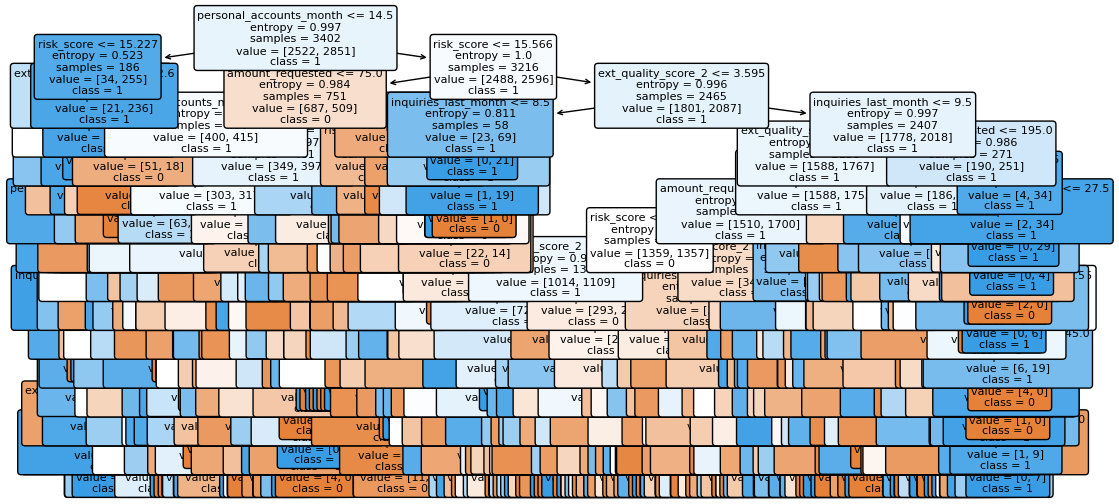

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=747696930)


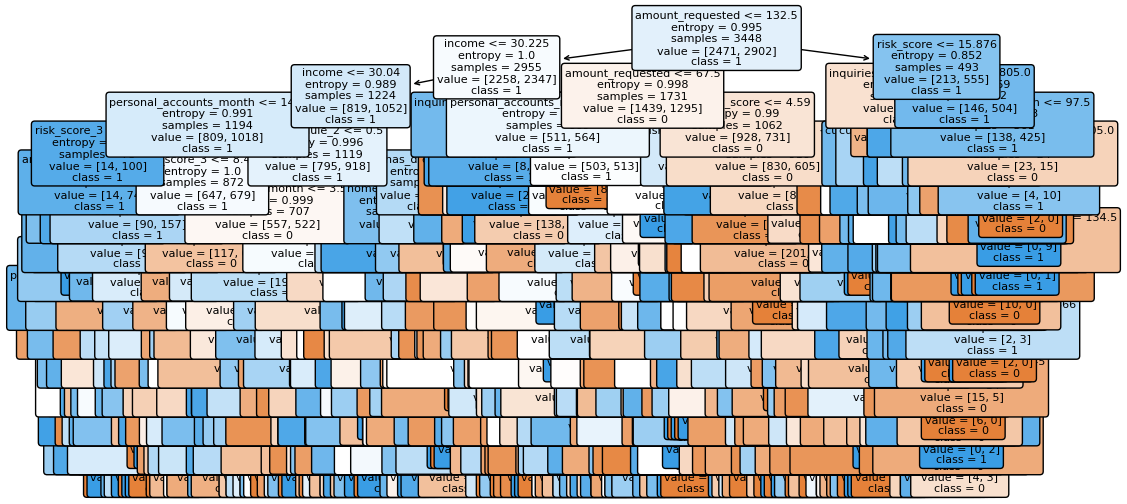

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=1686571834)


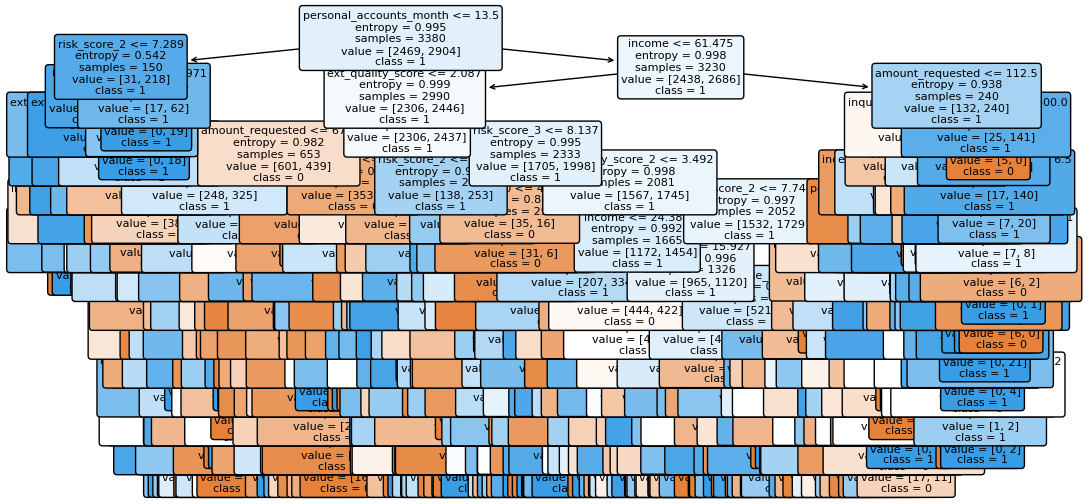

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=100346104)


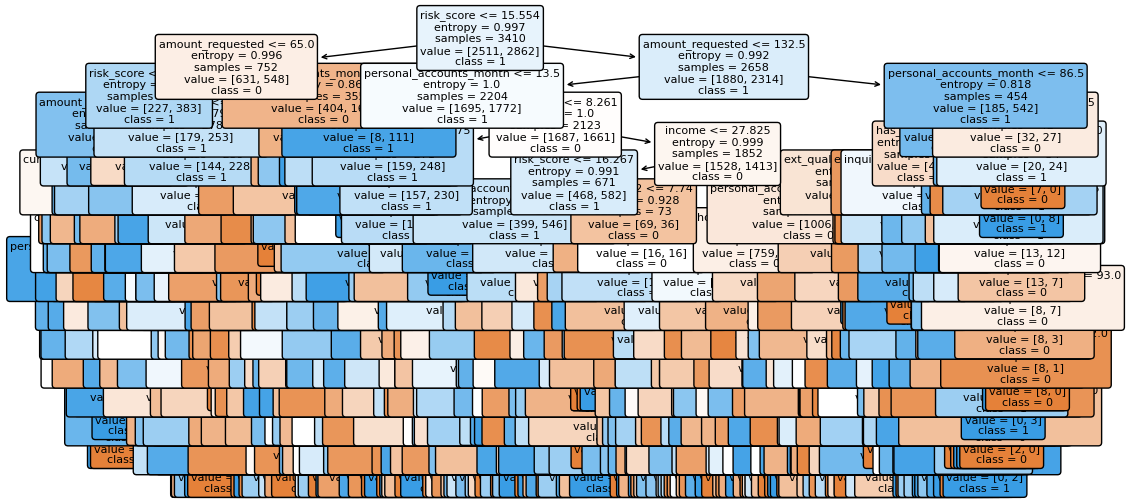

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=1638717036)


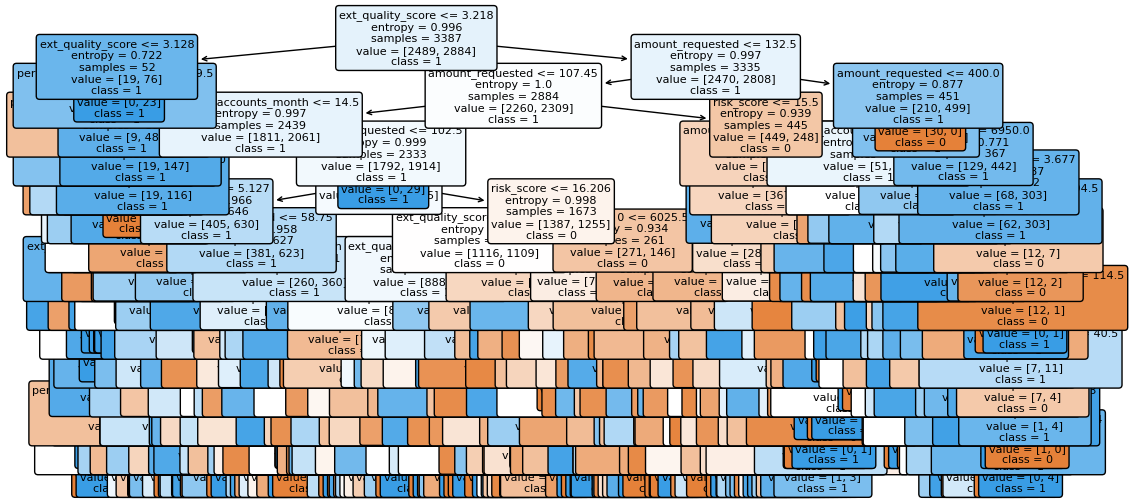

In [16]:
from sklearn import tree

features = X.columns.values
classes = ['0', '1']


for estimator in rfc.estimators_:
    print(estimator)

    plt.figure(figsize=(12, 6))

    tree.plot_tree(
        estimator,
        feature_names=features,
        class_names=classes,
        fontsize=8, 
        filled=True, 
        rounded=True
    )
    
    plt.show()

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2492
           1       0.85      0.87      0.86      2881

    accuracy                           0.85      5373
   macro avg       0.85      0.85      0.85      5373
weighted avg       0.85      0.85      0.85      5373



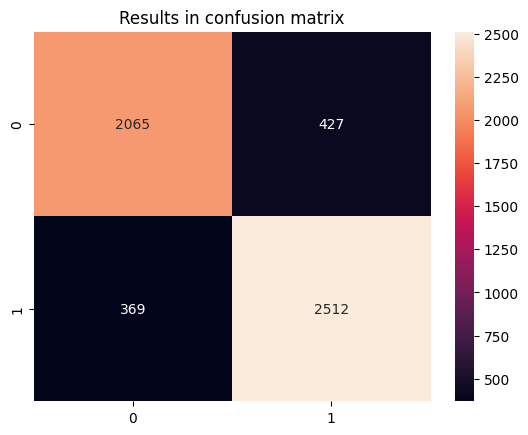

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

confMatrix = confusion_matrix(y_test, y_pred)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, y_pred))

### Por fim, confira a predição do modelo melhorado

In [18]:
model = RandomForestClassifier(
    criterion="gini", 
    n_estimators=1000, 
    max_depth=10
)

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8663688814442583

In [19]:
from sklearn import metrics

y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(acc)

0.8663688814442583


### Basicamente, o valor do `Score de Teste` e o `Resultado da Predição` são idênticos ...

### Plotando outra matrix de confusão, para ver se ocorreu alguma alteração.

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2492
           1       0.86      0.89      0.88      2881

    accuracy                           0.87      5373
   macro avg       0.87      0.86      0.87      5373
weighted avg       0.87      0.87      0.87      5373



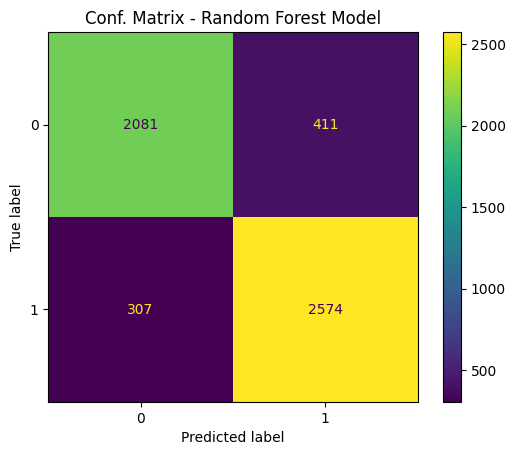

In [20]:
# Plotando outra matrix de confusão, 
# para ver se ocorreu alguma alteração.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Conf. Matrix - Random Forest Model")

print(classification_report(y_test, y_pred))

`Fim dos Testes com Random Forest`